## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. Data wrangling
#### 3. The elbow technique
#### 4. k-means clustering
#### 5. Conclusions

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import MinMaxScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Turn project folder path into a string
path = r'/Users/thomasradio/Documents/Jupyter/230808 Tom Radio Achievement 6 Project'

In [4]:
path

'/Users/thomasradio/Documents/Jupyter/230808 Tom Radio Achievement 6 Project'

In [5]:
pugetsound_tides_currents_lunar = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'pugetsound_tides_currents_lunar.pkl'))

In [6]:
pugetsound_tides_currents_lunar

,Dive_Site,Date,Day_of_Week,Time,Event,Current_Speed_(knots),Height (cm),Height (ft),Current_Station_Name,Current_Station_ID,Tide_Station_Name,Tide_Station_ID,Latitude,Longitude,Moon Illuminated
0,Alki,1/1/24,Monday,0:24:00,ebb,-0.5,NaN,NaN,HARBOR ISLAND WEST,PUG1507,NaN,NaN,47.588707,-122.380009,0.75
1,Alki,1/1/24,Monday,1:34:00,Low,NaN,20.0,0.66,NaN,NaN,LOCKHEED SHIPYARD,9447110.0,47.588707,-122.380009,0.75
2,Alki,1/1/24,Monday,4:00:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1508,NaN,NaN,47.588707,-122.380009,0.75
3,Alki,1/1/24,Monday,6:12:00,flood,0.1,NaN,NaN,HARBOR ISLAND WEST,PUG1509,NaN,NaN,47.588707,-122.380009,0.75
4,Alki,1/1/24,Monday,8:36:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1510,NaN,NaN,47.588707,-122.380009,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16621,Tacoma Narrows,12/31/24,Tuesday,14:36:00,flood,2.2,NaN,NaN,"THE NARROWS, NORTH",PUG4352,NaN,NaN,47.265336,-122.544439,0.00
16622,Tacoma Narrows,12/31/24,Tuesday,16:18:00,High,NaN,355.0,11.65,NaN,NaN,TACOMA NARROWS BRIDGE,9446486.0,47.265336,-122.544439,0.00
16623,Tacoma Narrows,12/31/24,Tuesday,16:54:00,slack,0.0,NaN,NaN,"THE NARROWS, NORTH",PUG4353,NaN,NaN,47.265336,-122.544439,0.00
16624,Tacoma Narrows,12/31/24,Tuesday,20:48:00,ebb,-5.0,NaN,NaN,"THE NARROWS, NORTH",PUG4354,NaN,NaN,47.265336,-122.544439,0.00


In [7]:
pugetsound_tides_currents_lunar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16626 entries, 0 to 16625
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dive_Site              16626 non-null  object 
 1   Date                   16626 non-null  object 
 2   Day_of_Week            16626 non-null  object 
 3   Time                   16626 non-null  object 
 4   Event                  16626 non-null  object 
 5   Current_Speed_(knots)  11000 non-null  float64
 6   Height (cm)            5626 non-null   float64
 7   Height (ft)            5626 non-null   float64
 8   Current_Station_Name   11000 non-null  object 
 9   Current_Station_ID     11000 non-null  object 
 10  Tide_Station_Name      5626 non-null   object 
 11  Tide_Station_ID        5626 non-null   float64
 12  Latitude               16626 non-null  float64
 13  Longitude              16626 non-null  float64
 14  Moon Illuminated       16626 non-null  float64
dtypes:

### 2. Data wrangling

In [8]:
# Remove categorical columns
columns_to_remove = ['Day_of_Week', 'Event', 'Height (cm)', 'Current_Station_Name', 
                    'Current_Station_ID', 'Tide_Station_Name', 'Tide_Station_ID', 'Latitude', 'Longitude']
pugetsound_tides_currents_lunar = pugetsound_tides_currents_lunar.drop(columns=columns_to_remove, axis=1)

In [9]:
pugetsound_tides_currents_lunar

,Dive_Site,Date,Time,Current_Speed_(knots),Height (ft),Moon Illuminated
0,Alki,1/1/24,0:24:00,-0.5,NaN,0.75
1,Alki,1/1/24,1:34:00,NaN,0.66,0.75
2,Alki,1/1/24,4:00:00,0.0,NaN,0.75
3,Alki,1/1/24,6:12:00,0.1,NaN,0.75
4,Alki,1/1/24,8:36:00,0.0,NaN,0.75
...,...,...,...,...,...,...
16621,Tacoma Narrows,12/31/24,14:36:00,2.2,NaN,0.00
16622,Tacoma Narrows,12/31/24,16:18:00,NaN,11.65,0.00
16623,Tacoma Narrows,12/31/24,16:54:00,0.0,NaN,0.00
16624,Tacoma Narrows,12/31/24,20:48:00,-5.0,NaN,0.00


In [10]:
# Define a function to remove "-" signs and convert to positive
def remove_minus_and_make_positive(value):
    if isinstance(value, (int, float)):  # Make sure the value is numeric
        return abs(value)  # Convert to positive
    return value  # Keep non-numeric values unchanged

# Apply the function to the "Current_Speed_(knots)" column
pugetsound_tides_currents_lunar['Current_Speed_(knots)'] = pugetsound_tides_currents_lunar['Current_Speed_(knots)'].apply(remove_minus_and_make_positive)

In [11]:
pugetsound_tides_currents_lunar

,Dive_Site,Date,Time,Current_Speed_(knots),Height (ft),Moon Illuminated
0,Alki,1/1/24,0:24:00,0.5,NaN,0.75
1,Alki,1/1/24,1:34:00,NaN,0.66,0.75
2,Alki,1/1/24,4:00:00,0.0,NaN,0.75
3,Alki,1/1/24,6:12:00,0.1,NaN,0.75
4,Alki,1/1/24,8:36:00,0.0,NaN,0.75
...,...,...,...,...,...,...
16621,Tacoma Narrows,12/31/24,14:36:00,2.2,NaN,0.00
16622,Tacoma Narrows,12/31/24,16:18:00,NaN,11.65,0.00
16623,Tacoma Narrows,12/31/24,16:54:00,0.0,NaN,0.00
16624,Tacoma Narrows,12/31/24,20:48:00,5.0,NaN,0.00


In [12]:
pugetsound_tides_currents_lunar.describe()

,Current_Speed_(knots),Height (ft),Moon Illuminated
count,11000.000000,5626.000000,16626.000000
mean,1.290073,6.140380,0.493181
std,1.998173,4.461695,0.352959
min,0.000000,-3.590000,0.000000
25%,0.000000,2.542500,0.132500
50%,0.000000,6.870000,0.480000
75%,2.000000,9.797500,0.850000
max,8.600000,14.510000,1.000000


In [13]:
# Create separate DataFrames for each dive site
alki_data = pugetsound_tides_currents_lunar[pugetsound_tides_currents_lunar['Dive_Site'] == 'Alki'].copy()
tacoma_data = pugetsound_tides_currents_lunar[pugetsound_tides_currents_lunar['Dive_Site'] == 'Tacoma Narrows'].copy()
deception_data = pugetsound_tides_currents_lunar[pugetsound_tides_currents_lunar['Dive_Site'] == 'Deception Pass'].copy()
saltcreek_data = pugetsound_tides_currents_lunar[pugetsound_tides_currents_lunar['Dive_Site'] == 'Salt Creek'].copy()

In [14]:
deception_data

,Dive_Site,Date,Time,Current_Speed_(knots),Height (ft),Moon Illuminated
4138,Deception Pass,1/1/24,0:48:00,0.0,NaN,0.75
4139,Deception Pass,1/1/24,2:01:00,NaN,0.62,0.75
4140,Deception Pass,1/1/24,3:18:00,4.0,NaN,0.75
4141,Deception Pass,1/1/24,6:42:00,0.0,NaN,0.75
4142,Deception Pass,1/1/24,9:12:00,NaN,10.63,0.75
...,...,...,...,...,...,...
8377,Deception Pass,12/31/24,15:06:00,0.0,NaN,0.00
8378,Deception Pass,12/31/24,16:05:00,NaN,9.34,0.00
8379,Deception Pass,12/31/24,18:06:00,7.5,NaN,0.00
8380,Deception Pass,12/31/24,21:42:00,0.0,NaN,0.00


In [15]:
# Convert the 'Date' column to datetime format
deception_data['Date'] = pd.to_datetime(deception_data['Date'])

In [16]:
deception_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4244 entries, 4138 to 8381
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Dive_Site              4244 non-null   object        
 1   Date                   4244 non-null   datetime64[ns]
 2   Time                   4244 non-null   object        
 3   Current_Speed_(knots)  2829 non-null   float64       
 4   Height (ft)            1415 non-null   float64       
 5   Moon Illuminated       4244 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 232.1+ KB


In [17]:
# Group the data by 'Date' and keep only the maximum value for each day for Current_Speed_(knots) and Height (ft) to eliminate NaN values
agg_funcs = {
    'Current_Speed_(knots)': 'max',
    'Height (ft)': 'max',
    'Moon Illuminated': 'first'  # No modification needed for 'Moon Illuminated'
}

In [18]:
daily_max_values = deception_data.groupby('Date').agg(agg_funcs).reset_index()

In [19]:
daily_max_values

,Date,Current_Speed_(knots),Height (ft),Moon Illuminated
0,2024-01-01,5.3,10.63,0.75
1,2024-01-02,5.1,10.53,0.67
2,2024-01-03,4.9,10.40,0.58
3,2024-01-04,4.9,10.22,0.48
4,2024-01-05,5.4,10.02,0.39
...,...,...,...,...
361,2024-12-27,6.5,9.45,0.13
362,2024-12-28,7.2,10.00,0.07
363,2024-12-29,7.6,10.47,0.03
364,2024-12-30,7.7,10.77,0.01


In [20]:
# Check for missing values

daily_max_values.isnull().sum()

Date                     0
Current_Speed_(knots)    0
Height (ft)              0
Moon Illuminated         0
dtype: int64

In [21]:
# Remove the 'Date' column
daily_max_values.drop('Date', axis=1, inplace=True)

In [22]:
daily_max_values

,Current_Speed_(knots),Height (ft),Moon Illuminated
0,5.3,10.63,0.75
1,5.1,10.53,0.67
2,4.9,10.40,0.58
3,4.9,10.22,0.48
4,5.4,10.02,0.39
...,...,...,...
361,6.5,9.45,0.13
362,7.2,10.00,0.07
363,7.6,10.47,0.03
364,7.7,10.77,0.01


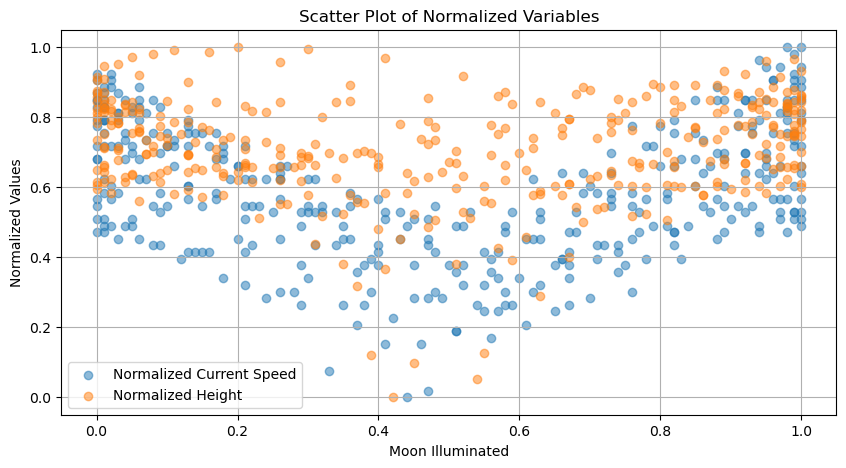

In [23]:
X = daily_max_values[['Current_Speed_(knots)', 'Height (ft)', 'Moon Illuminated']]

# Normalize or scale 'Current_Speed_(knots)' and 'Height (ft)' relative to each other
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X[['Current_Speed_(knots)', 'Height (ft)']])

# Create a new DataFrame with the normalized values
normalized_df = pd.DataFrame(X_normalized, columns=['Normalized_Current_Speed', 'Normalized_Height'])

# Add 'Moon Illuminated' to the normalized DataFrame
normalized_df['Moon Illuminated'] = X['Moon Illuminated']

# Create a scatter plot with 'Moon Illuminated' on the x-axis and both 'Normalized_Current_Speed' and 'Normalized_Height' on the y-axis
plt.figure(figsize=(10, 5))
plt.scatter(normalized_df['Moon Illuminated'], normalized_df['Normalized_Current_Speed'], label='Normalized Current Speed', alpha=0.5)
plt.scatter(normalized_df['Moon Illuminated'], normalized_df['Normalized_Height'], label='Normalized Height', alpha=0.5)
plt.xlabel('Moon Illuminated')
plt.ylabel('Normalized Values')
plt.legend()
plt.title('Scatter Plot of Normalized Variables')
plt.grid(True)
plt.show()

### 3. The elbow technique


/Users/thomasradio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thomasradio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thomasradio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thomasradio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

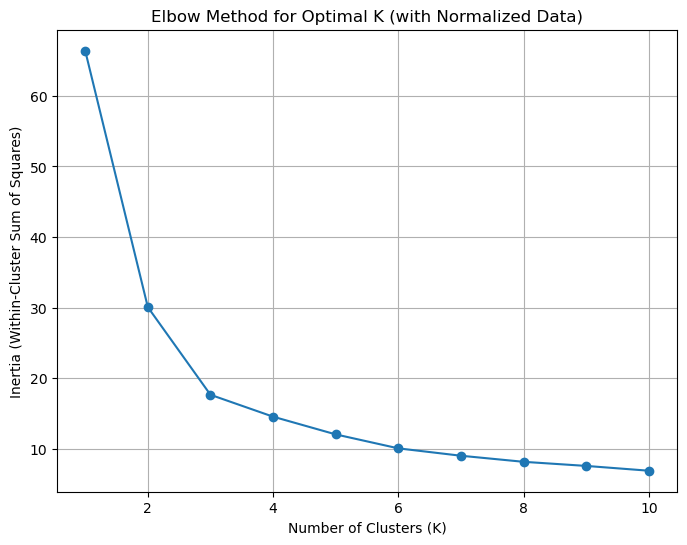

In [24]:
X_normalized = normalized_df[['Normalized_Current_Speed', 'Normalized_Height', 'Moon Illuminated']]

# Define a range of possible cluster numbers (K)
k_range = range(1, 11)

# Initialize a list to store the inertia (within-cluster sum of squares) values
inertia = []

# Iterate over each K value and compute K-Means clustering
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K (with Normalized Data)')
plt.grid(True)
plt.show()


### 4. k-means clustering


/Users/thomasradio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


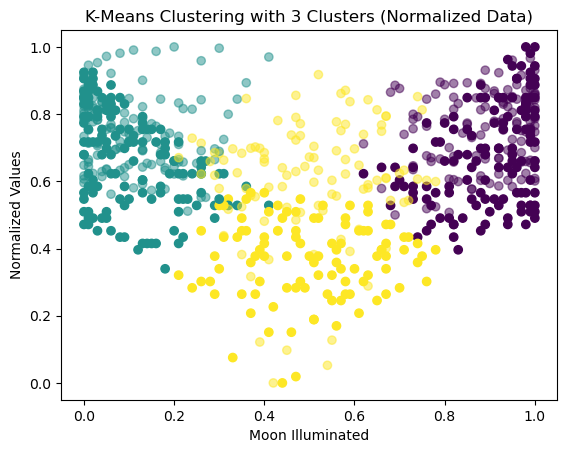

In [25]:
# Assuming normalized_df contains your dataset with normalized values
X_normalized = normalized_df[['Normalized_Current_Speed', 'Normalized_Height', 'Moon Illuminated']]

# Number of clusters (K)
num_clusters = 3  # Based on the elbow method result

# Initialize K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit K-Means to your data
normalized_df['Cluster'] = kmeans.fit_predict(X_normalized)

# Visualize the clusters
plt.scatter(X_normalized['Moon Illuminated'], X_normalized['Normalized_Current_Speed'], c=normalized_df['Cluster'], cmap='viridis')
plt.scatter(X_normalized['Moon Illuminated'], X_normalized['Normalized_Height'], c=normalized_df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Moon Illuminated')
plt.ylabel('Normalized Values')
plt.title(f'K-Means Clustering with {num_clusters} Clusters (Normalized Data)')
plt.show()

### 5. Conclusions

#### To perform the cluster analysis effectively, we had to normalize the data for "tidal height" and "current speed." This normalization allowed us to place both of these crucial dimensions on the y-axis of our cluster analysis plot, while "lunar phases" remained on the x-axis.

#### Applying the k-means algorithm with three clusters, based on the results of the elbow technique, revealed distinct groupings within the Deception Pass dive site:

#### 1. New Moon Cluster (the cluster on the left side): This cluster corresponds to the new moon phase, indicating higher current speeds and more significant tidal exchanges. Divers should be prepared for robust currents during this lunar phase.

#### 2. Intermediate Phase Cluster (the cluster in the middle): The intermediate lunar phases reside in this cluster, signaling slower current speeds and smaller tidal exchanges. Diving conditions are generally more manageable during these periods.

#### 3. Full Moon Cluster (the cluster on the right side): Similar to the new moon phase, the full moon phase falls within this cluster. It also exhibits higher current speeds and larger tidal exchanges, necessitating caution for divers during these periods.

### Key Insights:

#### Our cluster analysis has unveiled several critical insights for the Deception Pass dive site:

#### • Impact of Lunar Phases: We have established that lunar phases significantly influence both tidal height and current speed at Deception Pass. These variations are particularly evident during new moon and full moon phases.

#### • Diverse Diving Conditions: The conditions for diving at Deception Pass undergo substantial fluctuations throughout the lunar cycle, transitioning between more challenging and more manageable states.

#### • Enhanced Safety and Enjoyment: Understanding these patterns empowers divers to make informed decisions, promoting safer and more enjoyable diving experiences in this unique and dynamic underwater environment.

#### In conclusion, our cluster analysis has provided a detailed and data-driven perspective on how lunar phases correlate with tidal and current dynamics at the Deception Pass dive site. These findings not only contribute to the scientific understanding of this ecosystem but also offer practical guidance for divers seeking to explore its mysteries while staying safe and well-prepared.